# Introdução
Este projeto tem como objetivo realizar uma análise exploratória do conjunto de dados disponível no Kaggle, denominado 'Data Science Salaries 2024'. O foco principal desta análise é investigar e comparar os salários de diferentes cargos na área de ciência de dados. O conjunto de dados fornecido contém informações relevantes sobre os salários associados a uma variedade de cargos nesse campo específico.

Para realizar essa análise, serão aplicadas técnicas estatísticas e de visualização de dados, permitindo uma compreensão mais profunda das tendências salariais dentro da área de ciência de dados. Serão exploradas métricas como média, mediana, desvio padrão e quartis para fornecer uma visão abrangente da distribuição salarial. Além disso, serão utilizadas visualizações gráficas para identificar padrões e discrepâncias nos dados salariais.
Por meio dessa análise exploratória, espera-se obter uma compreensão mais sólida da distribuição salarial na área de ciência de dados ao longo dos anos, identificando possíveis fatores que influenciam os salários e fornecendo informações valiosas para profissionais e empresas interessadas nesse campo em constante evolução.

https://www.kaggle.com/datasets/sazidthe1/data-science-salaries

In [27]:
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import geopandas as gpd
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import plotly.express as px


In [28]:
data=pd.read_csv('data_science_salaries.csv')

In [29]:
from summarytools import dfSummary
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,job_title[object],1. Data Engineer2. Data Scientist3. Data Analyst4. Machine Learning Engineer5. Analytics Engineer6. Research Scientist7. Data Architect8. Research Engineer9. ML Engineer10. Applied Scientist11. other,"1,307 (19.8%)1,243 (18.8%)910 (13.8%)629 (9.5%)246 (3.7%)206 (3.1%)176 (2.7%)136 (2.1%)113 (1.7%)97 (1.5%)1,536 (23.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEeklEQVR4nO3dQU4bWQBF0Q9C6TAxQpFYRhbAInqxvQgvIPtACA9COhN60EkEsYlC8L+F7HNmGZUHVx9VqV7q5OHhYUDhdOkfwPEQGxmxkREbGbGRERsZsZERGxmxkTkZY5yPMd4tdP2vDw8P9wtdm9jZhw8f/l6tVpdLXHyz2dyenJz8I7jjcLZarS6vr6/vLy4uvpQXvru7e79ery9vbm7ejTHEdgTOxhjj4uLiy9XV1ecFrn++wDVZiBsEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjczbG/++W1Rde4pos62yz2dyu1+vLscC7ZZvN5naM8bW+LsuwQSBz4r/MorLUyeZEO0KLrKusqo5Tvq6yqjpeS62rrKqOkIe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPLBi6HL8Vpk8GLocpy8Fk7G4IXMrJPNycWWKYMXgxZ22fvgxaCF58wavBi0sMVDXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJ7H7wYtPCcKYMXgxZ28Vo4GYMXMm4QyLz2z6g/l/y2V62rrKh4iT9eV1lR8VKvXVdZUfHb3CCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR+eN1lRUVL/WqdZUVFS/htXAy1lVkfnWyObXYq2cHL8Ys7NvOwYsxCzP8avBizMJeeahLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGZufgxZiFGZ4dvBizsG9eCydj8ELmuZPNqcbe7Ry8GLsww9bgxdiFWZ4bvBi7sHce6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5mtdZVlFbPsXFdZVjGDDQIZ6yoyu042pxpTbK2rLKuY5cm6yrKKmXatqyyrmMJDXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJPBi/GLsy0NXgxdmEWr4WTMXgh8/PJ5lRjmieDF2MXZjr9Pni5vr6+/xbdrs9Bwqv9GLx8+7exC9N4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZm6wsvMMvjwYuxC1N5LZyMwQsZNwhk/BklY11FxrqKjHUVGTcIZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkfFaOBnrKjKPTzanGlP9GLwYuzDb6Wq1uvz48eMwdmG20zHGOD8//3fpH8Lh81CXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzOkYY9zf3/+19A/h8J1uNpvbT58+GbswndfCyRi8kPl5yvcWOGEP1JMvvLwFhjeH6+z7F14efXhjMXd3d+/X6/Xlzc3NuzGG2A7Mjy+8XF1dfV76x3zjKzMHykNdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mm/qCy9v5Xcwx+MvvLyJV3sMbw6X18LJGLyQcYNARmxkxEZGbGTERkZsZMRGRmxkxEbmP1hnJwmwxPdEAAAAAElFTkSuQmCC"">",0(0.0%)
2,experience_level[object],1. Senior-level2. Mid-level3. Entry-level4. Executive-level,"4,105 (62.2%)1,675 (25.4%)565 (8.6%)254 (3.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB9UlEQVR4nO3bQWrjMACFYXkIpd3YhEAOk0P0sHMI3yaEeDEt3biLbttCPOmTqL7vBCL8OMj4Deu6Fkj4U/sA9ENsxAyllKdSykPtg3TsbV3Xl9qHSNgdDofncRz3tQ/Sq2VZLsMw/O0huN04jvvT6fQyTdNr7cP05nq9Ps7zvD+fzw+llN8fWymlTNP0ejwe/9U+TKeeah8gxQWBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IjZlfLxqUvtg/Sot999tyzLZZ7nfenoU5eWLMtyKaW81T5Hgs/C6+vms/DBlI8UFwRiWv8b7eYvpgdNr6t6Wh71oNl1VW/Lox60vq7yOuYXcUEgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERkyzU74Wz8T/aXrK19PMrQc2CMSY8hGz9cnmicPNNq2rrJ7Y4uZ1ldUTW21dVzV3c6V9XuoSIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI+bmdZXVE1ttWldZPbGFDQIx1lXEfPdk8/Tirr5cV1lQcW+frqssqPgJ362rLKi4Ky91iREbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsRHz6brKgoqf8OW6yoKKe7NBIMa6ihgXBGLeAT8j2LnlSB9GAAAAAElFTkSuQmCC"">",0(0.0%)
3,employment_type[object],1. Full-time2. Contract3. Part-time4. Freelance,"6,552 (99.3%)19 (0.3%)16 (0.2%)12 (0.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABk0lEQVR4nO3bwWlbURBA0flCJPFGQghUQtKDisg2HauINGGkReJ44yyCS/D98HNOBbO4MDx4s7y9vQ0UdmsPwP9DbGSWmXmamU9rD8Lmve7P5/P3w+FwWnsStu3xeDzvD4fD6Xq9/j4ejy9rD8Q23e/3L7fb7bSfmTkejy+Xy+XX2kOxaU8eCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGT2M/++gKw9CNv13tdyPp9/+DzJR3s8Hs++hVN5XZzyUfFAICM2MrtlWb4ty+I1yofbzczXmfm89iBsnzVKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGR2M/NzZv6sPQjb57qKjDVKRmxkXFeRcV1FxholIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKuq8i4ri

Com apenas esta biblioteca podemos fazer diferças analises sobre os dados do dataset. Os cargos mais comuns são Data Engineer e Data Scientist, seguidos de Data Analyst, Machine Learning Engineer. O nível de experiência é dividido Senior-level, Mid-level, Entry-level, Executive-level, sendo o Senior-level o nível com maior predominância nos dados ocupando 62,2 %. Os tipos de contratos são divididos em Full-time, Contract, Part-time, Freelance sendo o full-time o contrato que predomina com 99,3 % dos dados. Os modelos de trabalho que aparecem no dataset são On-site 57,8 %, Remote 38,8% e Hybrid 3,4%, o fato de modelo híbrido ter apenas 3 por cento dos dados foi algo que me surpreendeu, já que no Brasil esse modelo está sendo cada vez mais utilizados pelas empresas. O ano de trabalho são 2020, 2021, 2022, 2023 e 2024. O país de residencia do empregado com maior incidência no dataset é os Estados Unidos com cerca de 80% dos dados, após vem Reino Unido com cerca de 6% e canada com 3,7%, eles são seguidos dos demais países com menores participações nos dados. O salário não será uma variável altamente utilizada nessa analise pois utilizaremos o salário em dolar como forma de padronizar as análises. Mas é possível novamente notar a predomincia dos EUA no dataset uma vez que o moeda mais usada nos salários é o Dólar com 88 % dos dados, seguido da libra com 5,1% e Euro com 4,4%, os demais possuem menor participação nos dados. Sobre os salários em dólar a média fica em 145.560,60 dolares, o menor salário é de 15.000 dolares e o maior 750.000 dolares anuais. No local da companhia novamente EUA predomina com 81% dos dados. Os tamanhos das Cia são dividos em Mediun 88,8%, Large 8,6% e Small com 2,6%.
Também é possivel ver que o dataset não possui valores missing, alem de possuir 11 colunas com 6599 linhas, sendo 9 colunas object e 2 int64. 


In [30]:
nomes_diferentes = data['job_title'].unique()
nomes_diferentes

array(['Data Engineer', 'Data Scientist', 'BI Developer',
       'Research Analyst', 'Business Intelligence Developer',
       'Data Analyst', 'Director of Data Science', 'MLOps Engineer',
       'Machine Learning Scientist', 'Machine Learning Engineer',
       'Data Science Manager', 'Applied Scientist',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Data Science',
       'Research Scientist', 'Research Engineer',
       'Managing Director Data Science', 'AI Engineer', 'Data Specialist',
       'Data Architect', 'Data Visualization Specialist', 'ETL Developer',
       'Data Science Practitioner', 'Computer Vision Engineer',
       'Data Lead', 'ML Engineer', 'Data Developer', 'Data Modeler',
       'Data Science Consultant', 'AI Architect',
       'Data Analytics Manager', 'Data Science Engineer',
       'Data Product Manager', 'Data Quality Analyst', 'Data Strategist',
       'Prompt Engineer', 'Data Science Lead',
       'Busi

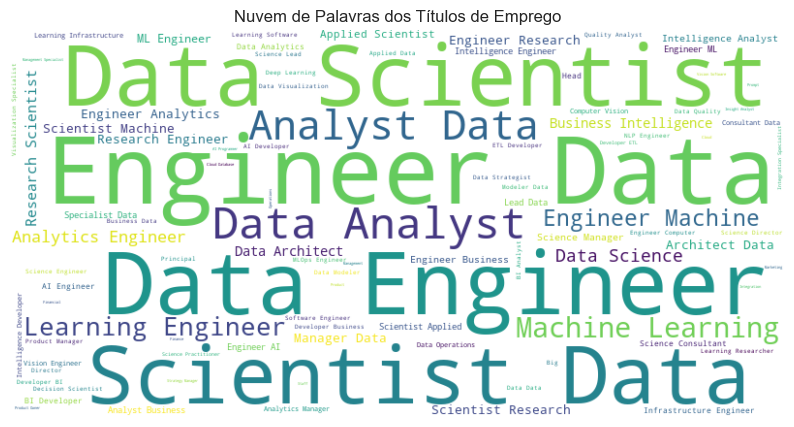

In [31]:
# Concatenar todos os títulos de emprego em uma única string
all_job_titles = ' '.join(data['job_title'].dropna())

# Criar um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_job_titles)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras dos Títulos de Emprego')
plt.axis('off')
plt.show()

Com esse gráfico de Palavras é possivel ver a diversidade de cargos existentes no Dataset

In [32]:

# Vamos supor que 'data' seja o seu DataFrame original

# Supondo que 'company_location' seja a coluna que você quer contar
contagem_ocorrencias = data['company_location'].value_counts()
total_ocorrencias = contagem_ocorrencias.sum()

porcentagens = (contagem_ocorrencias / total_ocorrencias) * 100
porcentagens.name = 'porcentagem'  # Define o nome da série como 'porcentagem'

# Concatena as séries em um DataFrame
company_location = pd.concat([contagem_ocorrencias, porcentagens], axis=1)

# Reset o índice para transformar os países em uma coluna
company_location.reset_index(inplace=True)
company_location.columns = ['company_location', 'ocorrencias', 'porcentagem']

company_location.loc[0, 'company_location'] = "United States of America"

# Exibe o DataFrame resultante
with pd.option_context('display.max_rows', None):
    print(company_location)




            company_location  ocorrencias  porcentagem
0   United States of America         5354    81.133505
1             United Kingdom          408     6.182755
2                     Canada          243     3.682376
3                    Germany           78     1.181997
4                      Spain           63     0.954690
5                      India           58     0.878921
6                     France           49     0.742537
7                  Australia           32     0.484922
8                   Portugal           26     0.393999
9                Netherlands           21     0.318230
10                    Brazil           17     0.257615
11                  Colombia           14     0.212153
12                     Italy           13     0.197000
13                    Greece           11     0.166692
14                    Mexico           11     0.166692
15                   Ireland           10     0.151538
16                    Poland           10     0.151538
17        

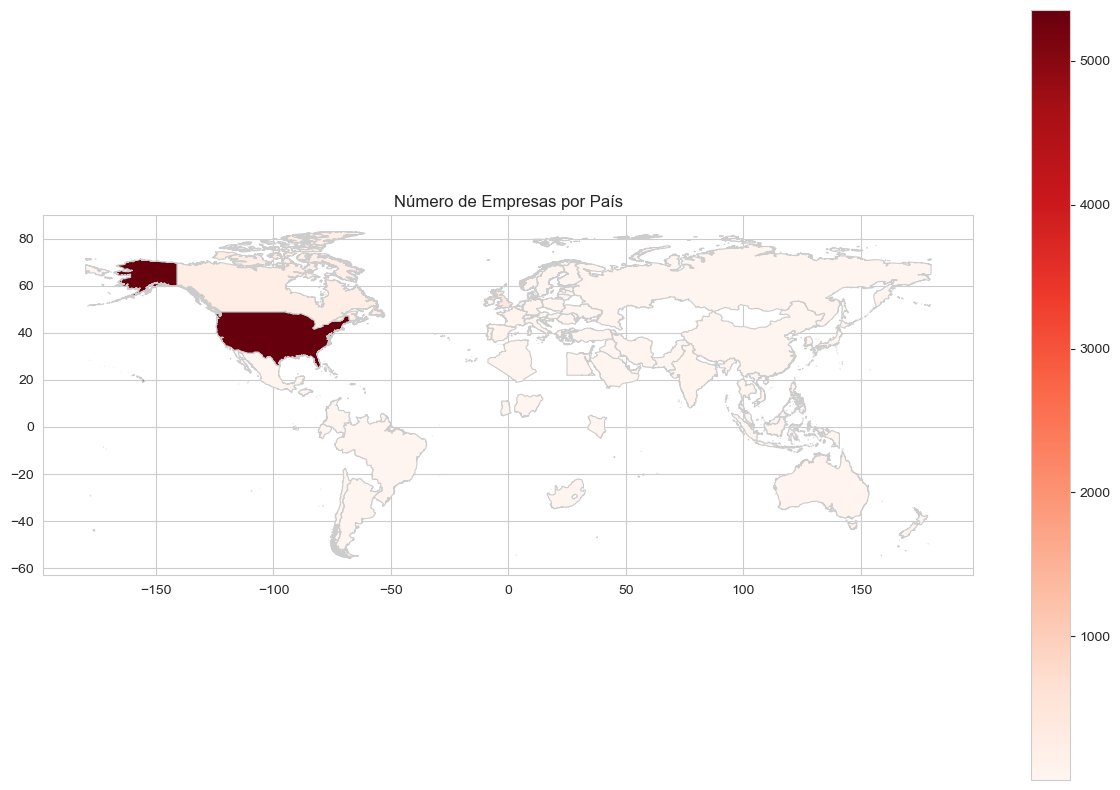

In [33]:


# Carregar o shapefile do mapa mundial
mapa_mundi = gpd.read_file('ne_10m_admin_0_countries.shp')

# Juntar os conjuntos de dados
mapa_com_dados = mapa_mundi.merge(company_location, how='left', left_on='NAME', right_on='company_location')

# Plotar o mapa com o número de empresas por país
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
mapa_com_dados.plot(column='ocorrencias', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Número de Empresas por País')
plt.show()


Este gráfico podemos ter a dimensão de como os mundo dos dados está espalhado ao redor do mundo, embora tenha uma predominancia nos EUA ele se encontra em cinco continentes nos mais variados países.

## Variação salarial por Cargo

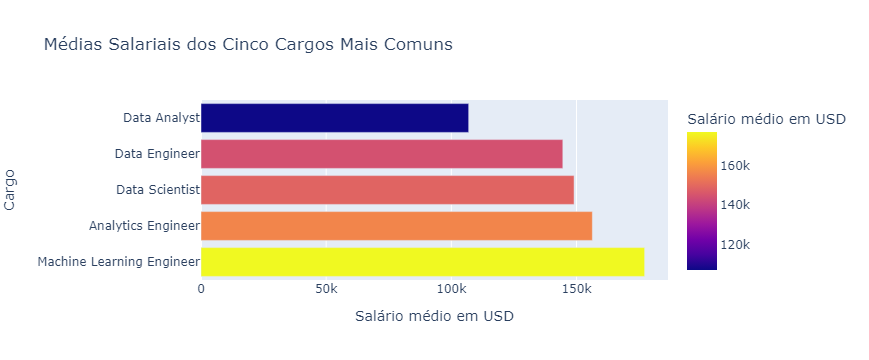

In [34]:
# Adicionar os novos cargos à lista dos cinco cargos mais comuns
top_jobs = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer',]

filtered_data = data[data['job_title'].isin(top_jobs)]

# Calcular as médias salariais
avg_salaries = filtered_data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

# Criar o gráfico de barras com Plotly
fig = px.bar(avg_salaries, x='salary_in_usd', y='job_title', orientation='h',
             title='Médias Salariais dos Cinco Cargos Mais Comuns',
             labels={'salary_in_usd': 'Salário médio em USD', 'job_title': 'Cargo'},
             color='salary_in_usd',
             color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

Dos cinco cargos analisados os com maiores salários são os de Machine Learning Engineer com média de 177.226 USD e os com menor média salárial é o Data Anlyst com média de 106.931 USD.

## Variação salarial ao longo dos anos

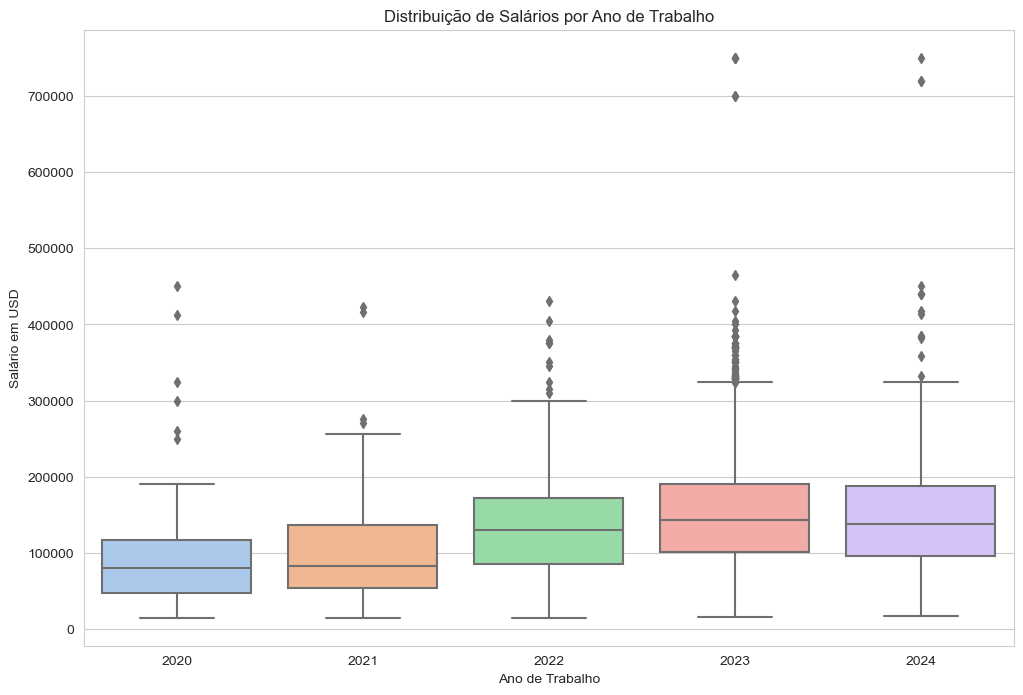

In [35]:
plt.figure(figsize=(12, 8))

# Crie os subplots baseados em 'work_year'
sns.boxplot(x='work_year', y='salary_in_usd', data=data)

# Configurando o estilo e paleta de cores do Seaborn 
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Ajuste os rótulos e o título
plt.xlabel('Ano de Trabalho')
plt.ylabel('Salário em USD')
plt.title('Distribuição de Salários por Ano de Trabalho')

# Mostre o gráfico
plt.show()

## Salário ao longo dos anos considerando o nível de experiência.

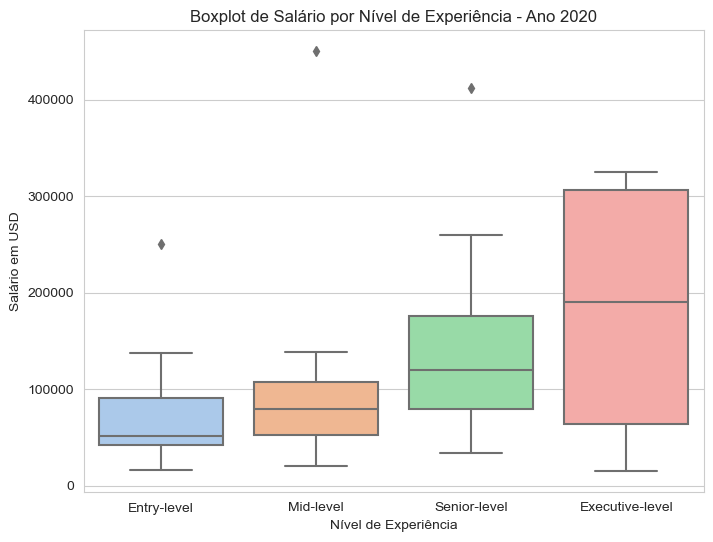

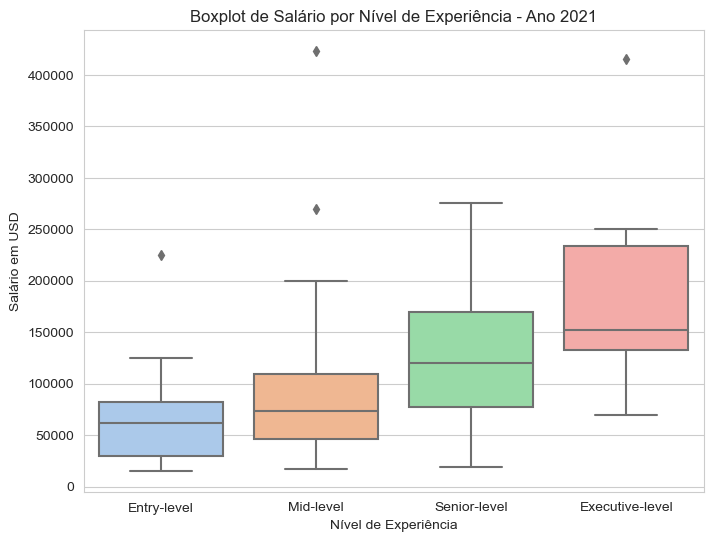

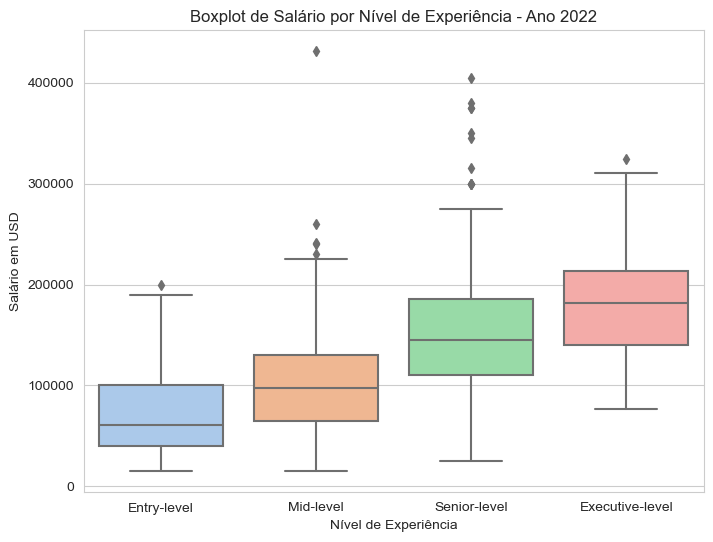

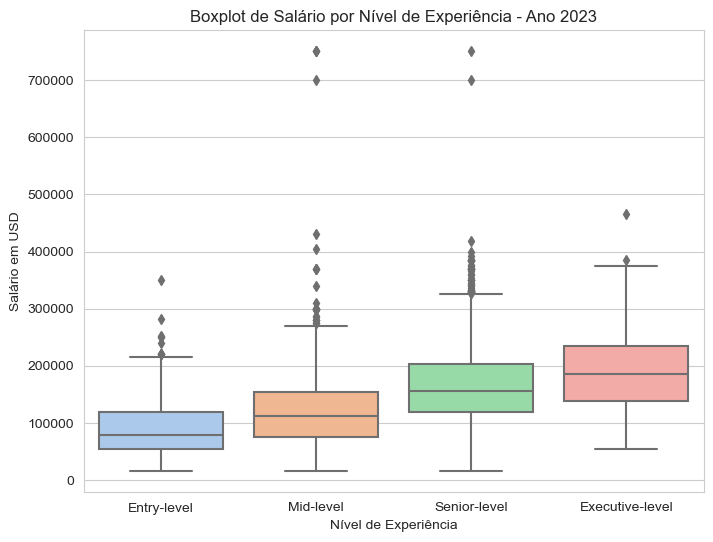

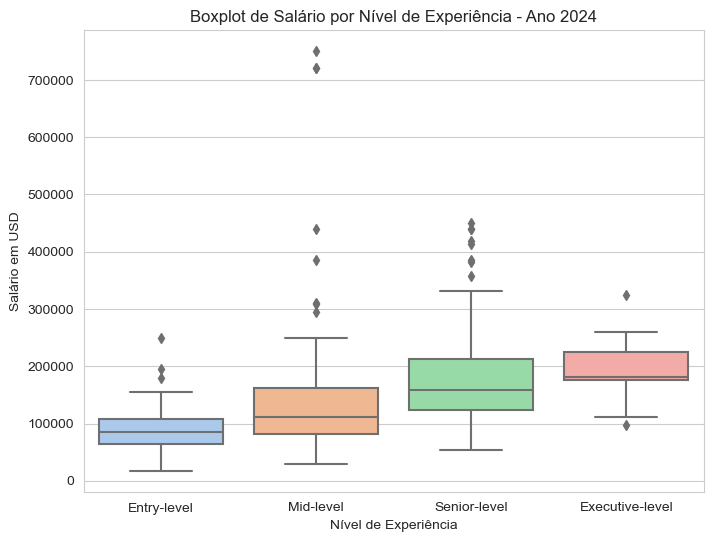

In [36]:
# Definindo a ordem desejada para 'experience_level'
experience_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

# Obtendo os anos únicos de 'work_year'
unique_work_years = sorted(data['work_year'].unique())

# Configurando o estilo e paleta de cores do Seaborn 
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Iterando sobre os anos únicos de 'work_year'
for work_year in unique_work_years:
    # Filtrando os dados para o ano de trabalho atual
    subset_data = data[data['work_year'] == work_year]
    
    # Criando o boxplot para o ano de trabalho atual usando o Seaborn
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='experience_level', y='salary_in_usd', data=subset_data, order=experience_order)
    
    # Configurando título e rótulos dos eixos
    plt.title(f'Boxplot de Salário por Nível de Experiência - Ano {work_year}')
    plt.xlabel('Nível de Experiência')
    plt.ylabel('Salário em USD')
    
    # Mostrando o plot
    plt.show()

In [37]:
experience_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

# Supondo que 'df' é o nome do seu DataFrame que contém os dados
# Substitua 'df' pelo nome real do seu DataFrame

# Reordenando a coluna 'experience_level' de acordo com a ordem desejada
data['experience_level'] = pd.Categorical(data['experience_level'], categories=experience_order, ordered=True)

# Calculando estatísticas descritivas para 'salario_in_usd' agrupado por 'work_year' e 'experience_level'
desc_por_grupo = data.groupby(['work_year', 'experience_level'])['salary_in_usd'].describe()
desc_por_grupo

count           mean            std      min  \
work_year experience_level                                                  
2020      Entry-level         21.0   69840.666667   51593.547260  15966.0   
          Mid-level           31.0   91870.935484   73915.351114  20000.0   
          Senior-level        19.0  138648.894737   88766.467048  33511.0   
          Executive-level      4.0  179958.250000  155652.841196  15000.0   
2021      Entry-level         46.0   63463.065217   38303.117102  15000.0   
          Mid-level           85.0   85440.776471   60973.217969  16904.0   
          Senior-level        75.0  125989.746667   62717.098965  18907.0   
          Executive-level     10.0  186128.000000  101365.169627  69741.0   
2022      Entry-level        102.0   72822.705882   43207.096688  15000.0   
          Mid-level          285.0  101354.003509   50916.270232  15000.0   
          Senior-level       686.0  150241.080175   56507.737691  25000.0   
          Executive-level     39.0  183837.743590   58959.693990  76309.0   
2023      Entry-level        346.0   90706.196532   50730.488257  16000.0   
          Mid-level         1084.0  124171.643911   70092.134614  15680.0   
          Senior-level      3011.0  164814.340751   64613.218905  15809.0   
          Executive-level    184.0  191130.081522   71788.058406  55000.0   
2024      Entry-level         50.0   90308.460000   43177.515817  16666.0   
          Mid-level          190.0  135577.726316   97704.959669  30000.0   
          Senior-level       314.0  171645.843949   71551.338989  53300.0   
          Executive-level     17.0  191874.470588   57728.454737  97254.0   

                                  25%       50%        75%       max  
work_year experience_level                                            
2020      Entry-level        42000.00   51321.0   91000.00  250000.0  
          Mid-level          53090.00   79833.0  108000.00  450000.0  
          Senior-level       79832.50  120000.0  176000.00  412000.0  
          Executive-level    63624.75  189916.5  306250.00  325000.0  
2021      Entry-level        29920.25   61915.5   82146.00  225000.0  
          Mid-level          46597.00   74000.0  110000.00  423000.0  
          Senior-level       77258.50  120000.0  170000.00  276000.0  
          Executive-level   132981.00  151833.5  233750.00  416000.0  
2022      Entry-level        40000.00   60413.0  100000.00  200000.0  
          Mid-level          65000.00   97500.0  130000.00  430967.0  
          Senior-level      110525.00  145000.0  186000.00  405000.0  
          Executive-level   140000.00  182160.0  213000.00  324000.0  
2023      Entry-level        53850.00   80000.0  120000.00  350000.0  
          Mid-level          76000.00  112450.0  155000.00  750000.0  
          Senior-level      120000.00  156400.0  203050.00  750000.0  
          Executive-level   139000.00  185000.0  235250.00  465000.0  
2024      Entry-level        65112.50   85000.0  108750.00  250000.0  
          Mid-level          82013.50  110815.0  161968.75  750000.0  
          Senior-level      123250.00  159000.0  212000.00  450000.0  
          Executive-level   175762.00  181900.0  225000.00  323700.0

 Analisando os boxplot e os dados da tabela acima é possivel afirmar que quase todos os salários crescem conforme os anos e também confome o nível de experiência. Porém é possivel notar que em quase todos os anos há senior ganhando menos que entry- junior, senior ganhando menos que mid e assim por diante, mas de forma geral como disse antes conforme o nível de experiência cresce o salario cresce. Ao decorrer dos anos é possível ver uma maior variacão salarial em todos os níveis de experiência, isso é possível se analisarmos o desvio padrão de cada um e sua crescente conforme os anos, outra formar de ver é a variabilidade dos dados é nos gráficos onde é possivel um número significativo de outliar ao longo dos anos principalmente no ano de 2023.

## Será que o salários nos 'Estados unidos' segue o aumento da inflação Americana?

In [38]:
data_us = data[data['company_location'] == 'United States']


In [39]:
experience_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

# Supondo que 'df' é o nome do seu DataFrame que contém os dados
# Substitua 'df' pelo nome real do seu DataFrame

# Reordenando a coluna 'experience_level' de acordo com a ordem desejada
data_us['experience_level'] = pd.Categorical(data_us['experience_level'], categories=experience_order, ordered=True)

# Calculando estatísticas descritivas para 'salario_in_usd' agrupado por 'work_year' e 'experience_level'
desc_por_grupo_us = data_us.groupby(['work_year', 'experience_level'])['salary_in_usd'].describe()
desc_por_grupo_us

C:\Users\ligim\AppData\Local\Temp\ipykernel_548\1793394461.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count           mean            std       min  \
work_year experience_level                                                   
2020      Entry-level          7.0  118000.000000   62537.988455   70000.0   
          Mid-level           15.0  124194.000000   93792.740947   45760.0   
          Senior-level         9.0  171403.111111  103096.552256   60000.0   
          Executive-level      2.0  312500.000000   17677.669530  300000.0   
2021      Entry-level         17.0   88617.647059   39885.590056   50000.0   
          Mid-level           38.0  119600.921053   70890.132488   20000.0   
          Senior-level        39.0  164899.846154   51002.773308   50000.0   
          Executive-level      4.0  262750.000000  111251.591749  150000.0   
2022      Entry-level         52.0   93223.346154   41482.372275   20000.0   
          Mid-level          155.0  125437.767742   44227.708534   24000.0   
          Senior-level       604.0  156004.076159   53778.468935   25000.0   
          Executive-level     33.0  196062.878788   53462.568784  110000.0   
2023      Entry-level        259.0  102436.227799   49191.897339   24000.0   
          Mid-level          812.0  136392.665025   68307.170491   20000.0   
          Senior-level      2640.0  169843.885985   63109.903106   38000.0   
          Executive-level    162.0  196063.506173   72549.618054   55000.0   
2024      Entry-level         41.0   99798.951220   41137.894729   41419.0   
          Mid-level          166.0  141792.807229  101475.299258   42400.0   
          Senior-level       282.0  174713.471631   72588.724051   53300.0   
          Executive-level     17.0  191874.470588   57728.454737   97254.0   

                                 25%       50%       75%       max  
work_year experience_level                                          
2020      Entry-level        81500.0  100000.0  121500.0  250000.0  
          Mid-level          91000.0  105000.0  124400.0  450000.0  
          Senior-level      120000.0  164000.0  190000.0  412000.0  
          Executive-level   306250.0  312500.0  318750.0  325000.0  
2021      Entry-level        70000.0   80000.0   90000.0  225000.0  
          Mid-level          84375.0  110000.0  149250.0  423000.0  
          Senior-level      137500.0  165000.0  197500.0  276000.0  
          Executive-level   213750.0  242500.0  291500.0  416000.0  
2022      Entry-level        62250.0   84000.0  124425.5  189750.0  
          Mid-level          98100.0  124000.0  151500.0  260000.0  
          Senior-level      120000.0  150000.0  190000.0  405000.0  
          Executive-level   159000.0  200000.0  222640.0  324000.0  
2023      Entry-level        65000.0   90000.0  130001.5  350000.0  
          Mid-level          93400.0  127037.5  166000.0  750000.0  
          Senior-level      125000.0  161000.0  205500.0  750000.0  
          Executive-level   145000.0  193250.0  238625.0  465000.0  
2024      Entry-level        71000.0   92700.0  115000.0  250000.0  
          Mid-level          86019.5  113500.0  166000.0  750000.0  
          Senior-level      126610.0  160000.0  216525.0  450000.0  
          Executive-level   175762.0  181900.0  225000.0  323700.0

In [40]:
# Selecionando apenas a média ('mean') das estatísticas descritivas
means = desc_por_grupo_us['mean']

# Reformatando o índice para facilitar a manipulação
means = means.reset_index()

# Criando um DataFrame com as médias
means_df = pd.DataFrame(means)


# Selecionando apenas a média ('mean') das estatísticas descritivas
means = desc_por_grupo_us['mean']

# Reformatando o índice para facilitar a manipulação
means = means.reset_index()

# Criando um DataFrame com as médias
means_df = pd.DataFrame(means)

# Ordenar o DataFrame por 'work_year' dentro de cada 'experience_level'
means_df_sorted = means_df.sort_values(by=['experience_level', 'work_year'])

# Agrupar os dados por 'experience_level'
groups = means_df_sorted.groupby('experience_level')

# Calcular a diferença percentual entre os salários de um ano para outro
percentual_changes = []
ano_inicial = 2020
for name, group in groups:
  pct_change = group['mean'].pct_change() * 100
  pct_change_shifted = pct_change.shift(-(ano_inicial - 2020))
  percentual_changes.extend(pct_change_shifted)

# Adicionar as diferenças percentuais como uma nova coluna ao DataFrame
means_df_sorted['percentual_change'] = percentual_changes

means_df_sorted

,work_year,experience_level,mean,percentual_change
0,2020,Entry-level,118000.000000,NaN
4,2021,Entry-level,88617.647059,-24.900299
8,2022,Entry-level,93223.346154,5.197271
12,2023,Entry-level,102436.227799,9.882591
16,2024,Entry-level,99798.951220,-2.574555
1,2020,Mid-level,124194.000000,NaN
5,2021,Mid-level,119600.921053,-3.698310
9,2022,Mid-level,125437.767742,4.880269
13,2023,Mid-level,136392.665025,8.733332
17,2024,Mid-level,141792.807229,3.959261


In [41]:
data_inflacao = {
    'Ano': [2020, 2021, 2022, 2023],
    'Taxa IPC (%)': [1.24, 4.60, 8.01, 4.14],
    'Ano Considerado': [2021 ,2022 ,2023 ,2024]
}

# Criar o dataframe
inflacao_eua = pd.DataFrame(data_inflacao)

# Exibir o dataframe
print(inflacao_eua)

    Ano  Taxa IPC (%)  Ano Considerado
0  2020          1.24             2021
1  2021          4.60             2022
2  2022          8.01             2023
3  2023          4.14             2024


Os dados de ipc do Estados Unidos foram retirados do site https://www.inflation.eu/pt/taxas-de-inflacao/estados-unidos/inflacao-historica/ipc-inflacao-estados-unidos.aspx

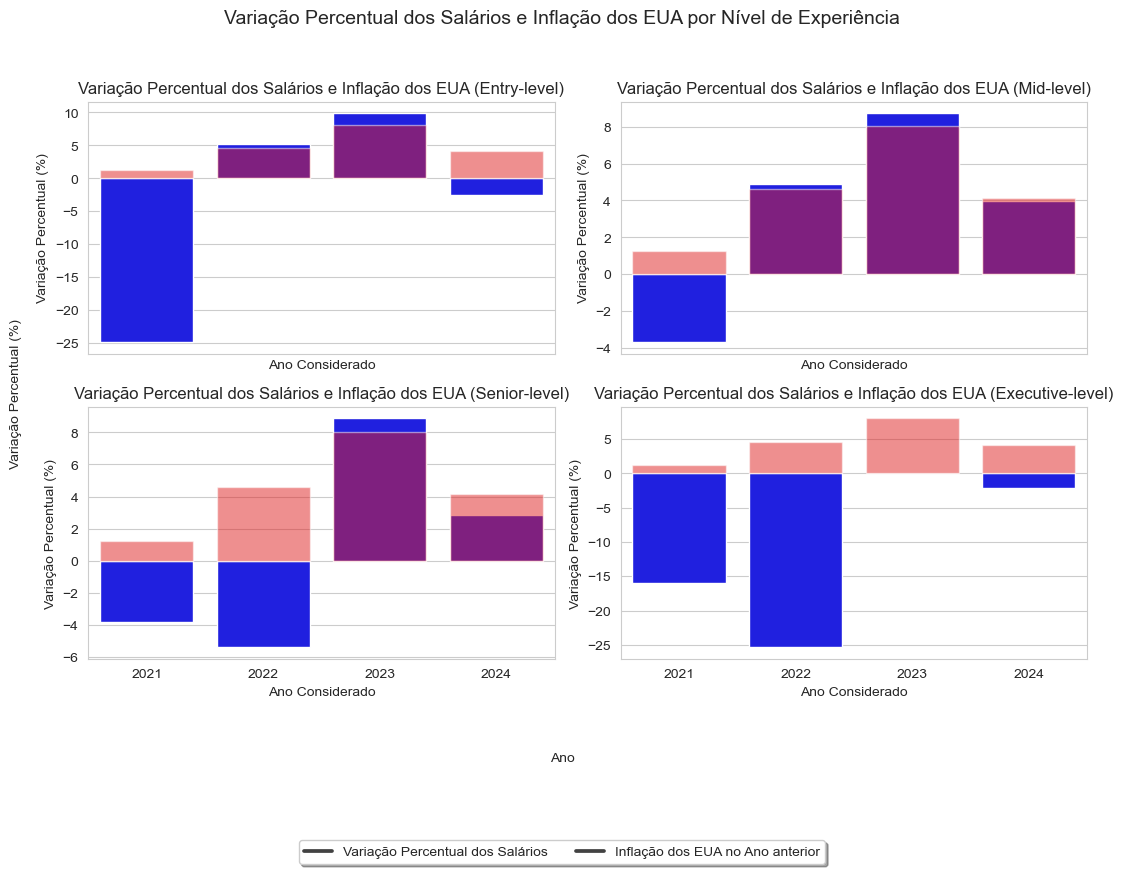

In [42]:
# Filtrar as linhas que não possuem valor de percentual_change
filtered_df = means_df_sorted.dropna(subset=['percentual_change'])

# Separar o DataFrame por nível de experiência
entry_level_df = filtered_df[filtered_df['experience_level'] == 'Entry-level']
mid_level_df = filtered_df[filtered_df['experience_level'] == 'Mid-level']
senior_level_df = filtered_df[filtered_df['experience_level'] == 'Senior-level']
executive_level_df = filtered_df[filtered_df['experience_level'] == 'Executive-level']

# Criar subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)

# Plotar os gráficos para cada nível de experiência
for ax, df, level in zip(axes.flatten(), [entry_level_df, mid_level_df, senior_level_df, executive_level_df], ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']):
    sns.barplot(x=df['work_year'], y=df['percentual_change'], ax=ax, color='b')
    sns.barplot(x=inflacao_eua['Ano Considerado'], y=inflacao_eua['Taxa IPC (%)'], ax=ax, color='r', alpha=0.5)
    ax.set_ylabel('Variação Percentual (%)')
    ax.set_title(f'Variação Percentual dos Salários e Inflação dos EUA ({level})')

# Adicionar título geral e legenda
fig.text(0.5, 0.04, 'Ano', ha='center')
fig.text(0.04, 0.5, 'Variação Percentual (%)', va='center', rotation='vertical')
fig.suptitle('Variação Percentual dos Salários e Inflação dos EUA por Nível de Experiência', fontsize=14)
fig.legend(labels=['Variação Percentual dos Salários', 'Inflação dos EUA no Ano anterior'], loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.tight_layout(rect=[0.05, 0.1, 0.95, 0.95])
plt.show()


Aqui podemos perceber que todos os salários tiveram redução não ano de 2020 para 2021. Já os cargos que mais acompanharam a inflação foram os de  Mid-level, seguidos dos cargos de Entry-level e depois os cargos de Senior-Level, os cargos de Executive-level sofreram na maioria dos anos com redução salárial ou estagnação, sendo o salário que mais desvalorizou ao longo dos anos.

## Será que quem trabalha remoto para as empresas dos EUA recebe igual que os residentes do país?

In [43]:
# Filtrando os dados para aqueles que não residem nos Estados Unidos
non_us_data = data_us[data_us['employee_residence'] != 'United States']

# Calculando a contagem de ocorrências por ano e por nível de experiência
occurrences = non_us_data.groupby(['work_year', 'experience_level']).size().reset_index(name='count')

print("Ocorrências por ano e nível de experiência para funcionários fora dos Estados Unidos:")
print(occurrences)

Ocorrências por ano e nível de experiência para funcionários fora dos Estados Unidos:
    work_year experience_level  count
0        2020      Entry-level      0
1        2020        Mid-level      3
2        2020     Senior-level      2
3        2020  Executive-level      0
4        2021      Entry-level      0
5        2021        Mid-level      6
6        2021     Senior-level      5
7        2021  Executive-level      1
8        2022      Entry-level      6
9        2022        Mid-level      7
10       2022     Senior-level      4
11       2022  Executive-level      0
12       2023      Entry-level     10
13       2023        Mid-level      4
14       2023     Senior-level      6
15       2023  Executive-level      1


In [44]:

# Filtrando os dados para os Estados Unidos e funcionários fora dos EUA
us_data = data_us[data_us['employee_residence'] == 'United States']
non_us_data = data_us[data_us['employee_residence'] != 'United States']

# Calculando a média dos salários por 'experience_level' para os Estados Unidos
us_salary_avg_by_level = us_data.groupby('experience_level')['salary_in_usd'].mean()

# Calculando a média dos salários por 'experience_level' para funcionários fora dos EUA
non_us_salary_avg_by_level = non_us_data.groupby('experience_level')['salary_in_usd'].mean()

print("Média dos salários por nível de experiência para funcionários nos Estados Unidos:")
print(us_salary_avg_by_level)

print("\nMédia dos salários por nível de experiência para funcionários fora dos Estados Unidos:")
print(non_us_salary_avg_by_level)

Média dos salários por nível de experiência para funcionários nos Estados Unidos:
experience_level
Entry-level        102100.650000
Mid-level          136165.766724
Senior-level       168077.052010
Executive-level    198168.023148
Name: salary_in_usd, dtype: float64

Média dos salários por nível de experiência para funcionários fora dos Estados Unidos:
experience_level
Entry-level         65413.750000
Mid-level           68488.250000
Senior-level       118068.705882
Executive-level    182968.000000
Name: salary_in_usd, dtype: float64


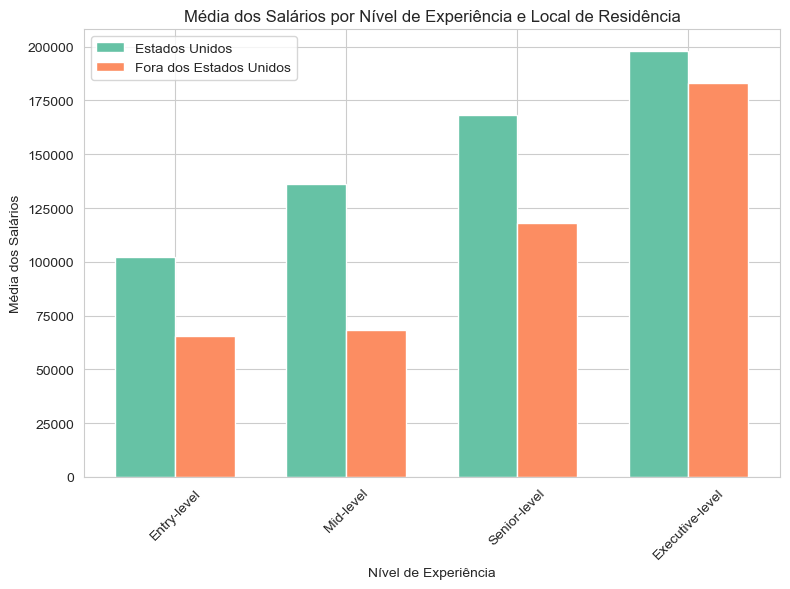

In [45]:
# Filtrando os dados para os Estados Unidos e funcionários fora dos EUA
us_data = data_us[data_us['employee_residence'] == 'United States']
non_us_data = data_us[data_us['employee_residence'] != 'United States']

# Calculando a média dos salários por 'experience_level' para os Estados Unidos
us_salary_avg_by_level = us_data.groupby('experience_level')['salary_in_usd'].mean()

# Calculando a média dos salários por 'experience_level' para funcionários fora dos EUA
non_us_salary_avg_by_level = non_us_data.groupby('experience_level')['salary_in_usd'].mean()

# Obtendo a largura de cada barra
bar_width = 0.35

# Criando o índice das barras para os Estados Unidos
us_indices = np.arange(len(us_salary_avg_by_level))

# Criando o índice das barras para funcionários fora dos EUA
non_us_indices = [x + bar_width for x in us_indices]

# Cores mais suaves
us_color = '#66c2a5'  # Verde-azulado claro
non_us_color = '#fc8d62'  # Laranja claro

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))

# Adicionando as barras para os Estados Unidos
ax.bar(us_indices, us_salary_avg_by_level.values, bar_width, color=us_color, label='Estados Unidos')

# Adicionando as barras para funcionários fora dos EUA
ax.bar(non_us_indices, non_us_salary_avg_by_level.values, bar_width, color=non_us_color, label='Fora dos Estados Unidos')

# Adicionando rótulos e título
ax.set_xlabel('Nível de Experiência')
ax.set_ylabel('Média dos Salários')
ax.set_title('Média dos Salários por Nível de Experiência e Local de Residência')
ax.set_xticks([x + bar_width/2 for x in range(len(us_salary_avg_by_level))])
ax.set_xticklabels(us_salary_avg_by_level.index)

# Adicionando a legenda
ax.legend()

# Mostrando o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente o layout para evitar sobreposição
plt.show()

Aqui é possível ver que é mais baratos para as empresas Norte Americanas contratarem funcionários fora do país, principalmente para os níveis de experiência Entry-level e Mid-level. Porem é necessário ressaltar o menor numero de dados para os funcionários de fora de US, o que pode gerar uma menor precisão dos dados.

# Conclusão 
Concluindo, é evidente que os salários na área de dados estão diretamente correlacionados com o nível de experiência dos profissionais. Ao longo dos anos, observa-se um aumento significativo nas médias salariais, refletindo a valorização crescente desses especialistas no mercado. Além disso, para os empresários americanos, contratar profissionais de dados pode ser vantajoso, uma vez que, em geral, esses profissionais têm salários mais baixos do que seus pares americanos, oferecendo uma oportunidade de economia nos custos laborais. No entanto, é crucial reconhecer que a qualidade e competência desses profissionais devem ser priorizadas para garantir o sucesso e a eficiência das operações empresariais.